In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
NASA = pd.read_csv('sampled_NASA_200k.csv')

In [7]:
NASA.head(5)

,lon,lat,Date,SWdown,LWdown,SWnet,LWnet,Qle,Qh,Qg,...,CCond,RCS,RCT,RCQ,RCSOL,RSmin,RSMacr,LAI,GVEG,Streamflow
0,-119.0625,42.4375,201210,163.68220,263.8475,113.22010,-87.98739,7.125942,25.181420,-5.958329,...,3.882617e-04,0.328813,0.636860,0.839660,0.312697,225.0,0.072202,1.510700,0.030827,1.521202
1,-91.6875,42.6875,201311,78.28305,253.0317,57.57054,-57.22678,8.193757,9.064996,-16.550700,...,3.703498e-04,0.224300,0.225639,0.977168,0.140168,35.0,0.101256,1.335817,0.230389,0.262829
2,-116.0625,50.3125,202111,49.82485,245.8828,18.95472,-36.95293,0.508750,-5.577223,-11.604300,...,7.466666e-09,0.212222,0.037808,0.989515,0.000000,300.0,0.000000,5.323477,0.203754,3.125006
3,-74.1875,40.9375,202105,246.01990,327.9143,201.53530,-64.50790,32.293430,101.753300,3.373923,...,1.439904e-03,0.307459,0.798956,0.926027,0.320145,200.0,0.000000,3.954453,0.575912,39.173390
4,-94.1875,30.0625,201706,268.87290,411.8996,219.58370,-45.70792,128.021200,42.106240,3.623333,...,1.013671e-02,0.369103,0.979265,0.886697,0.752096,70.0,0.000000,3.322349,0.615523,4.316254


In [8]:
print("Lon Range:", NASA['lon'].min(), NASA['lon'].max())
print("Lat Range:", NASA['lat'].min(), NASA['lat'].max())

Lon Range: -124.9375 -67.0625
Lat Range: 25.0625 52.9375


##### Wybranie ciepłych miesięcy, aby otrzymać realny obraz występującej roślinności

In [9]:
NASA['Date'] = NASA['Date'].astype(str)
NASA_lato = NASA[NASA['Date'].str[-2:].isin(["05", "06", "07", "08", "09", "10"])]

##### Kolumny, które mogą mieć największy wpływ na pustynnienie (wg ustaleń Mariusza po przeprowadzonym researchu)

In [10]:
selected_columns = ["lon", "lat", "Rainf", "Evap", "AvgSurfT", "Albedo", "SoilT_40_100cm", "GVEG"]
NASA_lato = NASA_lato[selected_columns].dropna()

In [11]:
NASA_lato.head(5)

,lon,lat,Rainf,Evap,AvgSurfT,Albedo,SoilT_40_100cm,GVEG
0,-119.0625,42.4375,22.0672,7.629402,280.2746,40.87769,283.7812,0.030827
3,-74.1875,40.9375,125.9735,34.582930,288.0775,24.00672,284.2830,0.575912
4,-94.1875,30.0625,284.3076,132.679000,299.5116,24.61111,295.5570,0.615523
5,-117.0625,32.9375,1.4660,32.135890,295.4950,22.64583,290.7068,0.300523
7,-85.0625,43.4375,58.6264,83.969650,292.4481,24.78056,284.8408,0.737928


# CD - Chihuahuan Desert
# CP - Colorado Plateau
# GBD - Great Basin Desert

##### Obszary pustynne

In [12]:
CD = NASA_lato[(NASA_lato['lon'] >= -104) & (NASA_lato['lon'] <= -102) & (NASA_lato['lat'] >= 30) & (NASA_lato['lat'] <= 31)]
CP = NASA_lato[(NASA_lato['lon'] >= -110.5) & (NASA_lato['lon'] <= -108.5) & (NASA_lato['lat'] >= 39) & (NASA_lato['lat'] <= 40.5)]
GBD = NASA_lato[(NASA_lato['lon'] >= -116) & (NASA_lato['lon'] <= -114) & (NASA_lato['lat'] >= 40) & (NASA_lato['lat'] <= 41.5)]

##### Obszary pustynno - niepustynne

In [13]:
CD_i_niepustynia = NASA_lato[(NASA_lato['lon'] >= -106.5) & (NASA_lato['lon'] <= -104.5) & (NASA_lato['lat'] >= 32.5) & (NASA_lato['lat'] <= 33.5)]
CP_i_niepustynia = NASA_lato[(NASA_lato['lon'] >= -109) & (NASA_lato['lon'] <= -107) & (NASA_lato['lat'] >= 37.5) & (NASA_lato['lat'] <= 39)]
GBD_i_niepustynia = NASA_lato[(NASA_lato['lon'] >= -115) & (NASA_lato['lon'] <= -113) & (NASA_lato['lat'] >= 42.5) & (NASA_lato['lat'] <= 44)]

##### Obszary niepustynne

In [14]:
niepustynia_przy_CD = NASA_lato[(NASA_lato['lon'] >= -109.5) & (NASA_lato['lon'] <= -107.5) & (NASA_lato['lat'] >= 33) & (NASA_lato['lat'] <= 34)]
niepustynia_przy_CP = NASA_lato[(NASA_lato['lon'] >= -107) & (NASA_lato['lon'] <= -105) & (NASA_lato['lat'] >= 39) & (NASA_lato['lat'] <= 40.5)]
niepustynia_przy_GBD = NASA_lato[(NASA_lato['lon'] >= -124) & (NASA_lato['lon'] <= -122) & (NASA_lato['lat'] >= 39.5) & (NASA_lato['lat'] <= 41)]

# Wizualizacje + wstępne ustalenia parametrów

##### GVEG (wskaźnik roślinności)

In [15]:
def plot_histogram(ax, data, column, title, color):
    ax.hist(data[column], bins=20, color=color, edgecolor="black")
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_xlim(min(min(CD[column]), min(CD_i_niepustynia[column]), min(niepustynia_przy_CD[column]),
                    min(CP[column]), min(CP_i_niepustynia[column]), min(niepustynia_przy_CP[column]),
                    min(GBD[column]), min(GBD_i_niepustynia[column]), min(niepustynia_przy_GBD[column])), 
                max(max(CD[column]), max(CD_i_niepustynia[column]), max(niepustynia_przy_CD[column]),
                    max(CP[column]), max(CP_i_niepustynia[column]), max(niepustynia_przy_CP[column]),
                    max(GBD[column]), max(GBD_i_niepustynia[column]), max(niepustynia_przy_GBD[column])))

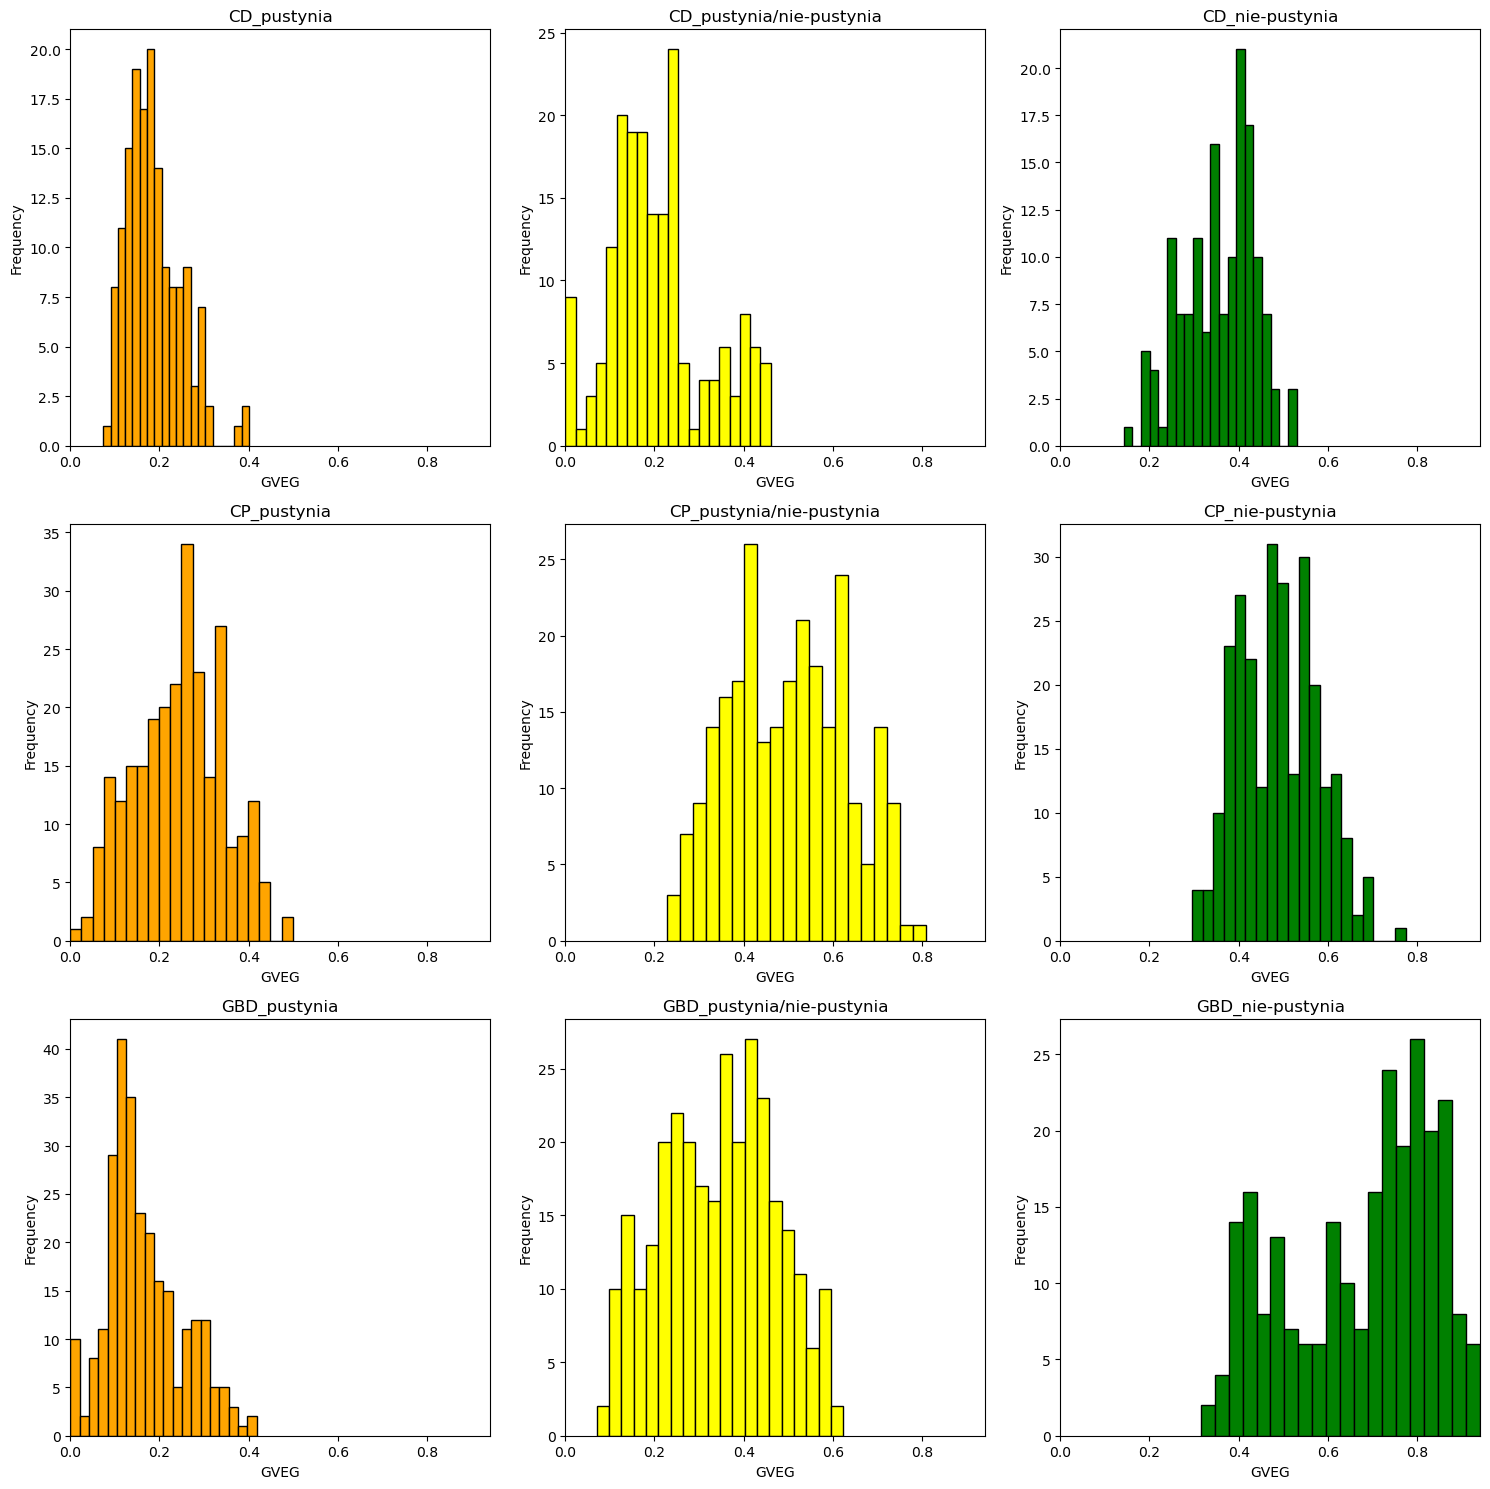

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'GVEG', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'GVEG', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'GVEG', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'GVEG', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'GVEG', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'GVEG', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'GVEG', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'GVEG', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'GVEG', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [17]:
GVEG_graniczne = round(
    pd.Series([
        CD['GVEG'].quantile(0.75),
        niepustynia_przy_CD['GVEG'].quantile(0.25),
        CP['GVEG'].quantile(0.75),
        niepustynia_przy_CP['GVEG'].quantile(0.25),
        GBD['GVEG'].quantile(0.75),
        niepustynia_przy_GBD['GVEG'].quantile(0.25),
    ]).mean(skipna=True), 3
)


In [18]:
print("GVEG_graniczne:", GVEG_graniczne)

GVEG_graniczne: 0.333


##### Rainf (wskaźnik opadów deszczu)

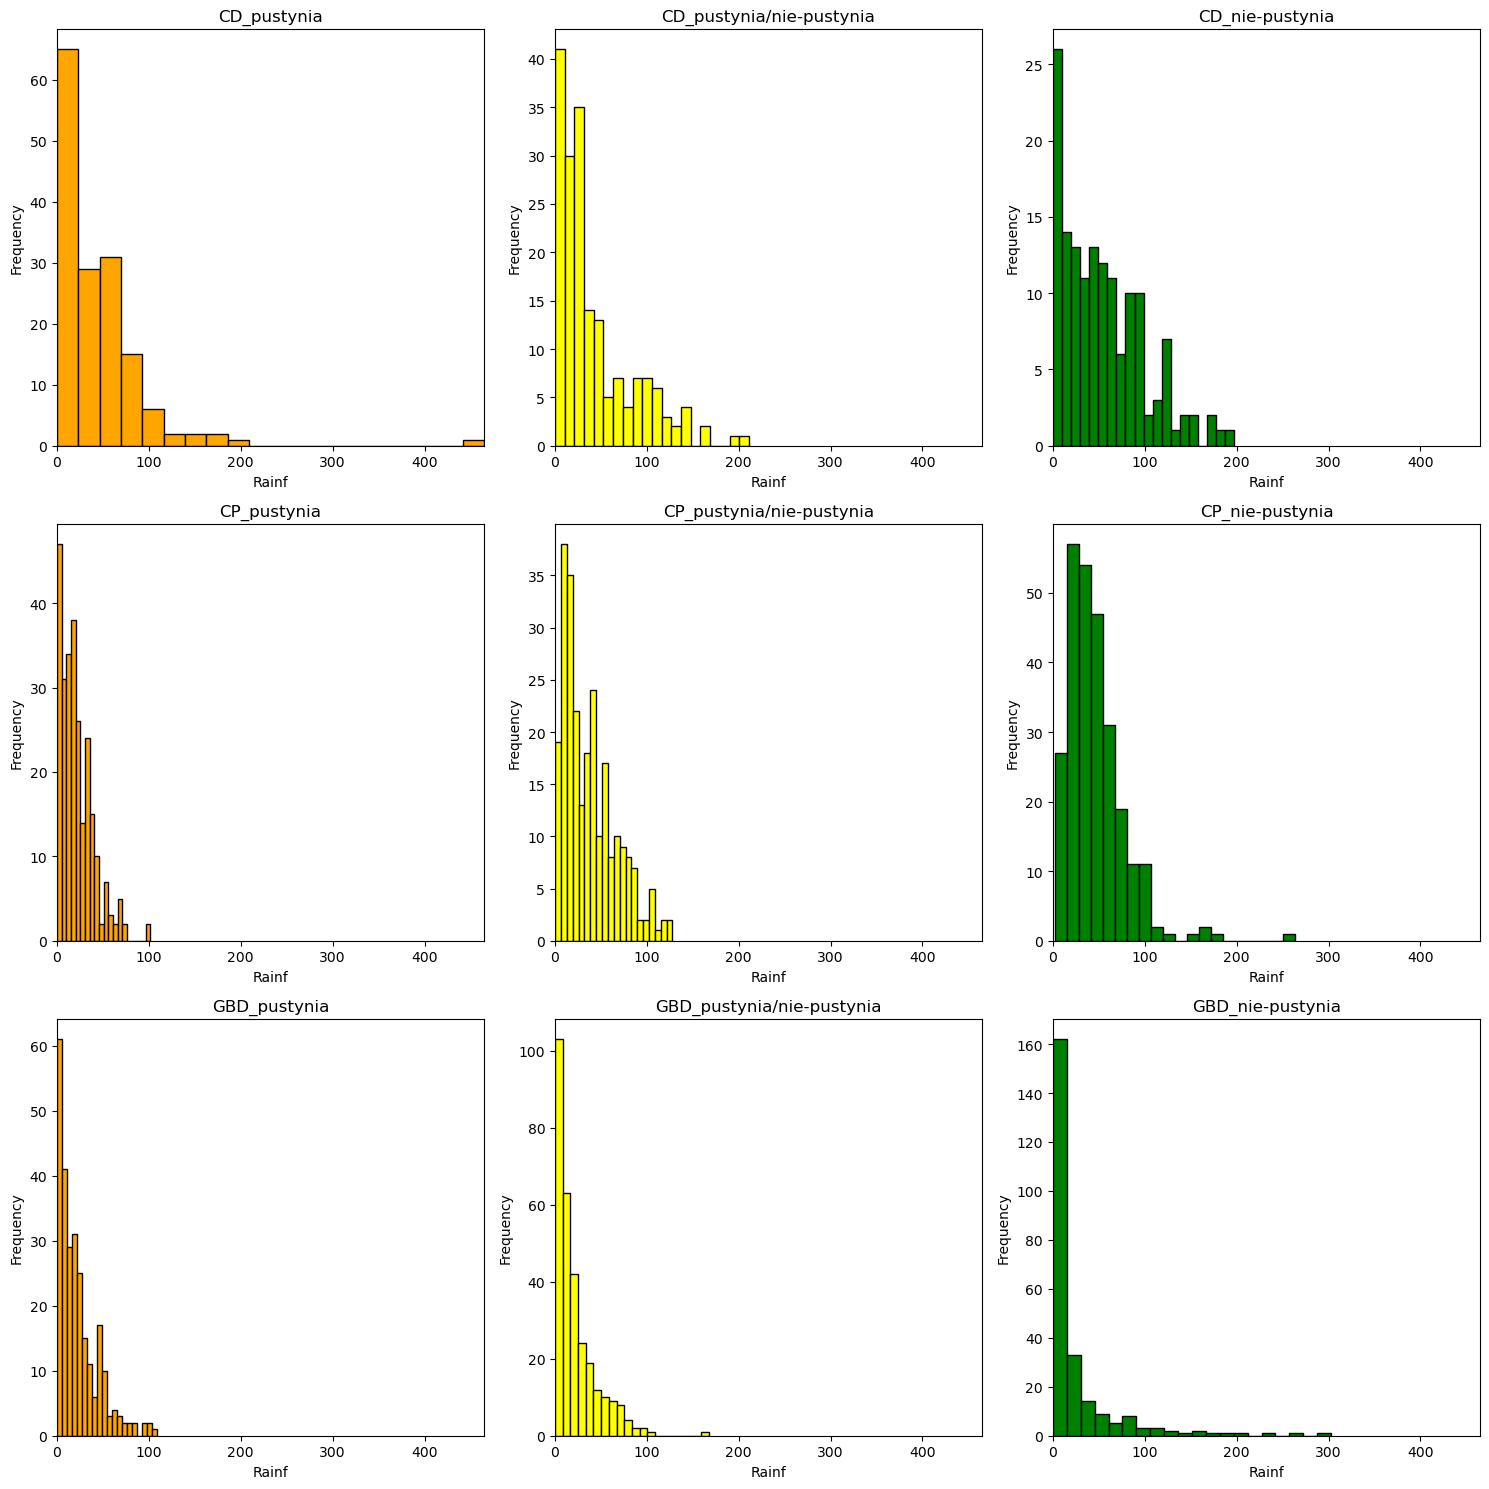

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'Rainf', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'Rainf', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'Rainf', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'Rainf', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'Rainf', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'Rainf', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'Rainf', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'Rainf', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'Rainf', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [20]:
Rainf_graniczne = round(
    pd.Series([
        CD['Rainf'].quantile(0.75),
        niepustynia_przy_CD['Rainf'].quantile(0.25),
        CP['Rainf'].quantile(0.75),
        niepustynia_przy_CP['Rainf'].quantile(0.25),
        GBD['Rainf'].quantile(0.75),
        niepustynia_przy_GBD['Rainf'].quantile(0.25),
    ]).mean(skipna=True)
)

In [21]:
print("Rainf_graniczne:", Rainf_graniczne)

Rainf_graniczne: 28


##### Evap (wskaźnik całkowitej ewapotranspiracji)

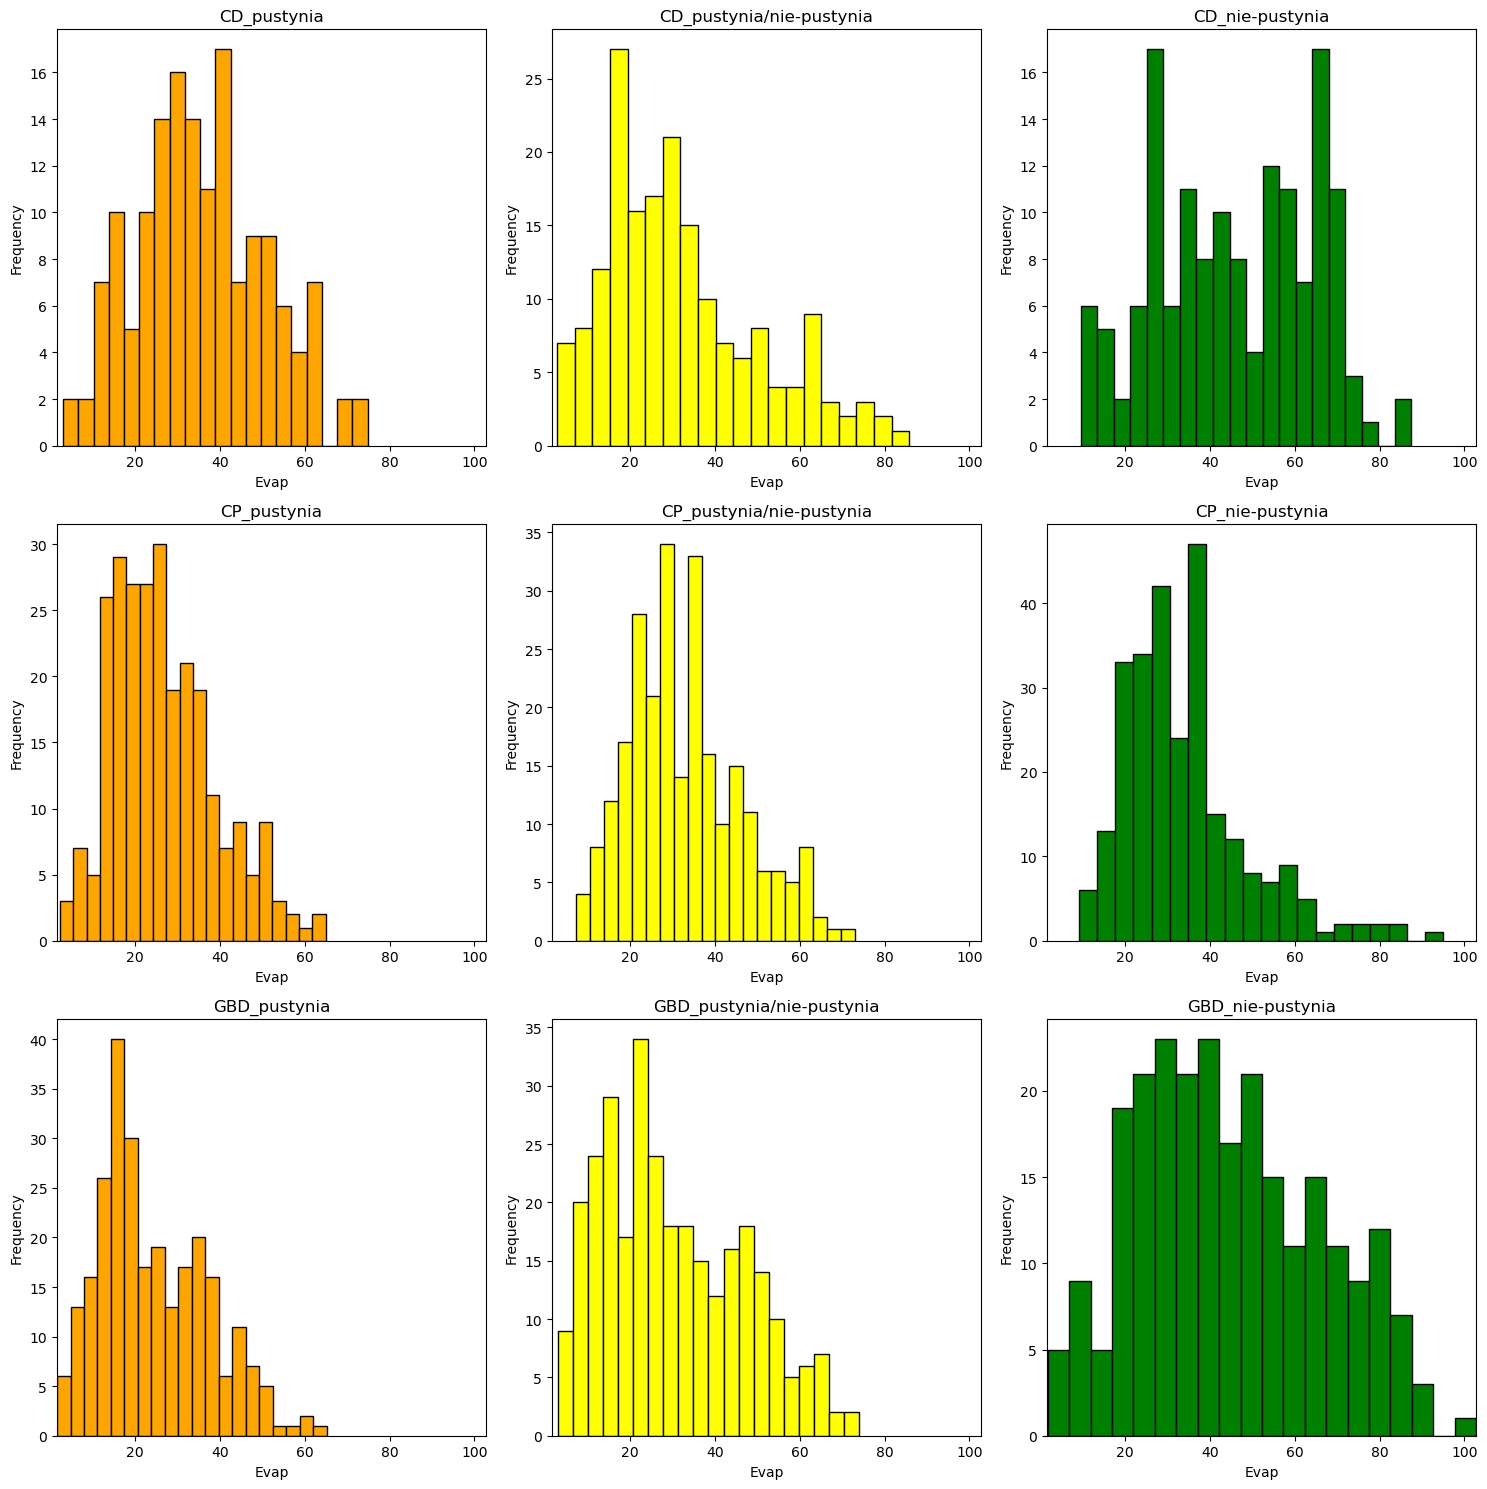

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'Evap', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'Evap', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'Evap', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'Evap', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'Evap', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'Evap', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'Evap', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'Evap', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'Evap', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [23]:
Evap_graniczne = round(
    pd.Series([
        CD['Evap'].quantile(0.75),
        niepustynia_przy_CD['Evap'].quantile(0.25),
        CP['Evap'].quantile(0.75),
        niepustynia_przy_CP['Evap'].quantile(0.25),
        GBD['Evap'].quantile(0.75),
        niepustynia_przy_GBD['Evap'].quantile(0.25),
    ]).mean(skipna=True)
)

In [24]:
print("Evap_graniczne:", Evap_graniczne)

Evap_graniczne: 33


##### AvgSurfT (wskaźnik średniej temperatury powierzchni ziemi)

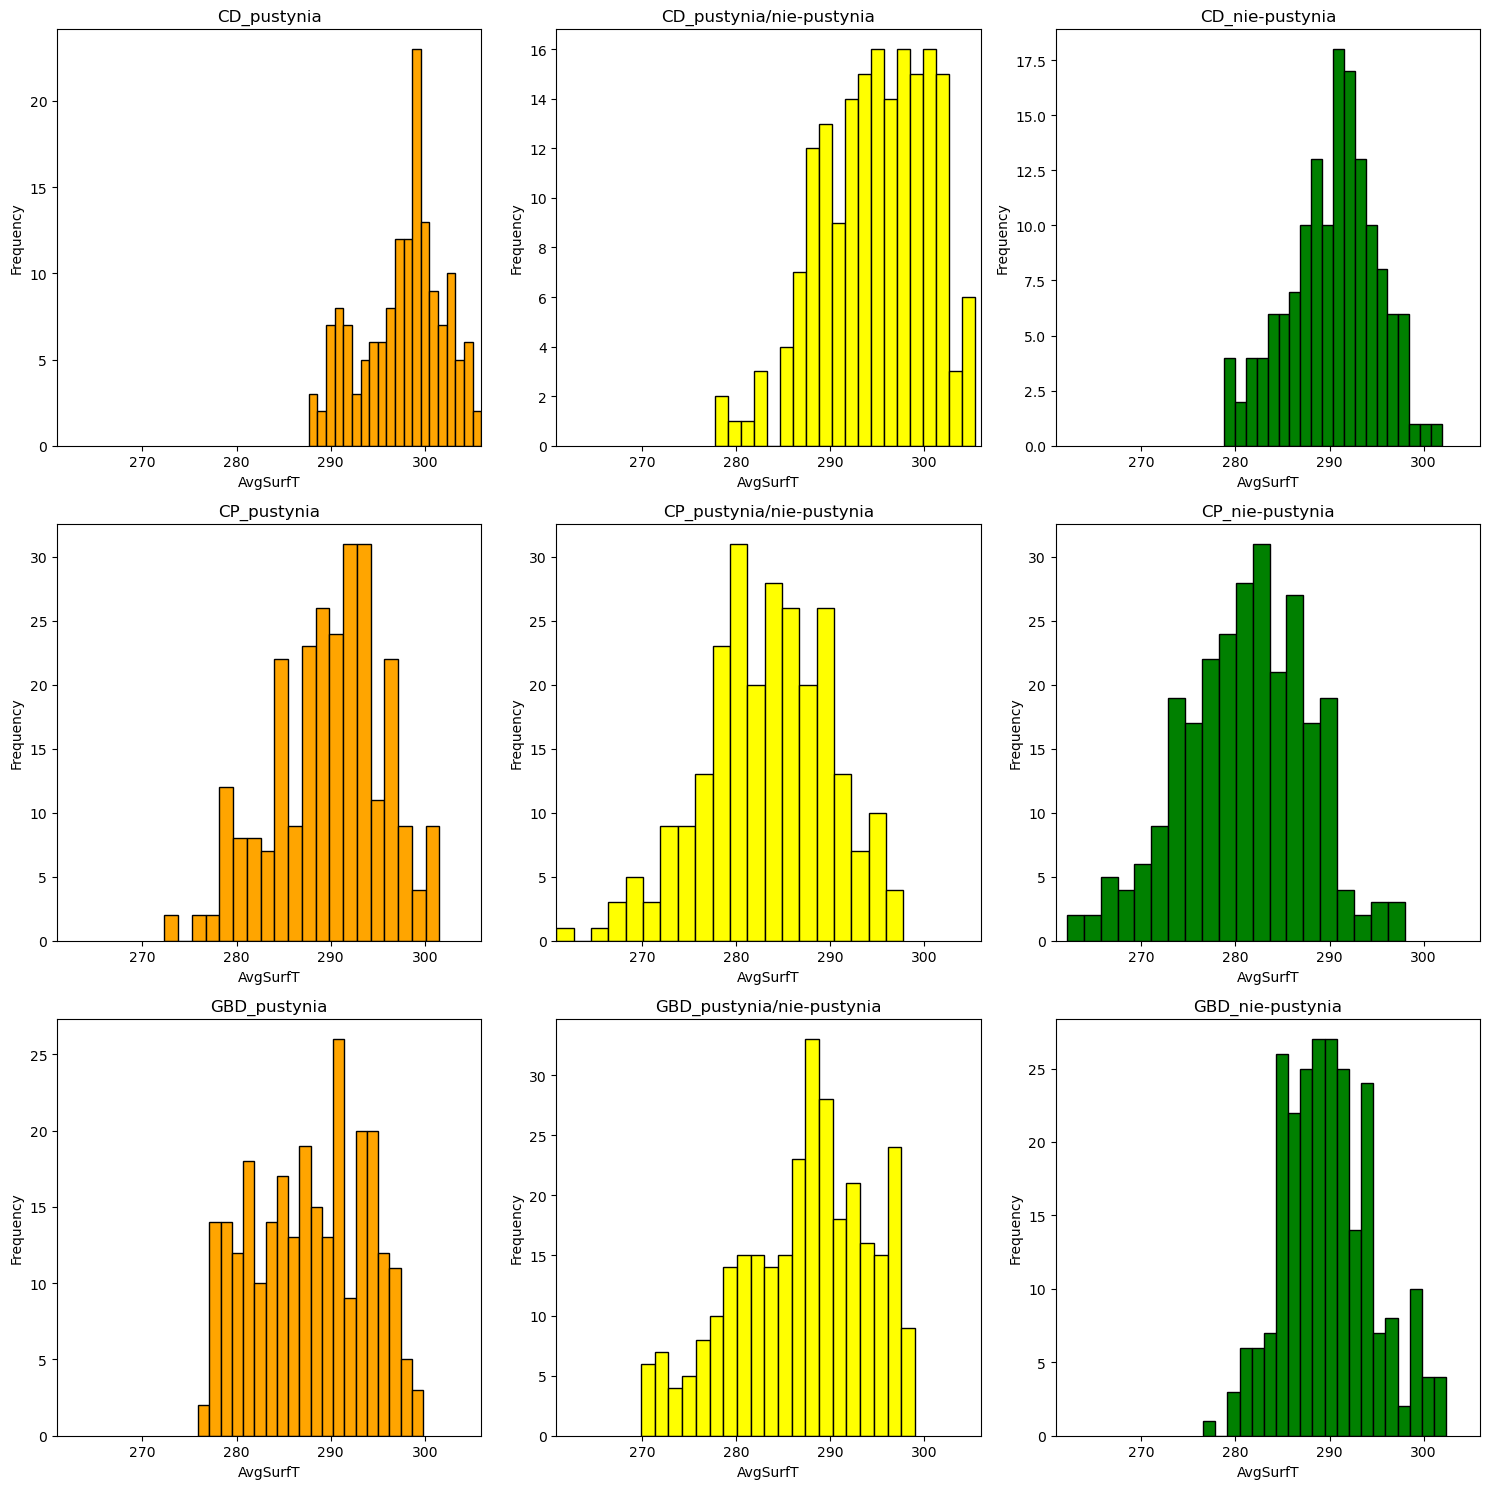

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'AvgSurfT', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'AvgSurfT', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'AvgSurfT', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'AvgSurfT', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'AvgSurfT', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'AvgSurfT', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'AvgSurfT', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'AvgSurfT', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'AvgSurfT', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [26]:
AvgSurfT_graniczne = round(
    pd.Series([
        CD['AvgSurfT'].quantile(0.25),
        niepustynia_przy_CD['AvgSurfT'].quantile(0.75),
        CP['AvgSurfT'].quantile(0.25),
        niepustynia_przy_CP['AvgSurfT'].quantile(0.75),
        GBD['AvgSurfT'].quantile(0.25),
        niepustynia_przy_GBD['AvgSurfT'].quantile(0.75),
    ]).mean(skipna=True)
)

In [27]:
print("AvgSurfT_graniczne:", AvgSurfT_graniczne)

AvgSurfT_graniczne: 289


##### Albedo (wskaźnik albedo)

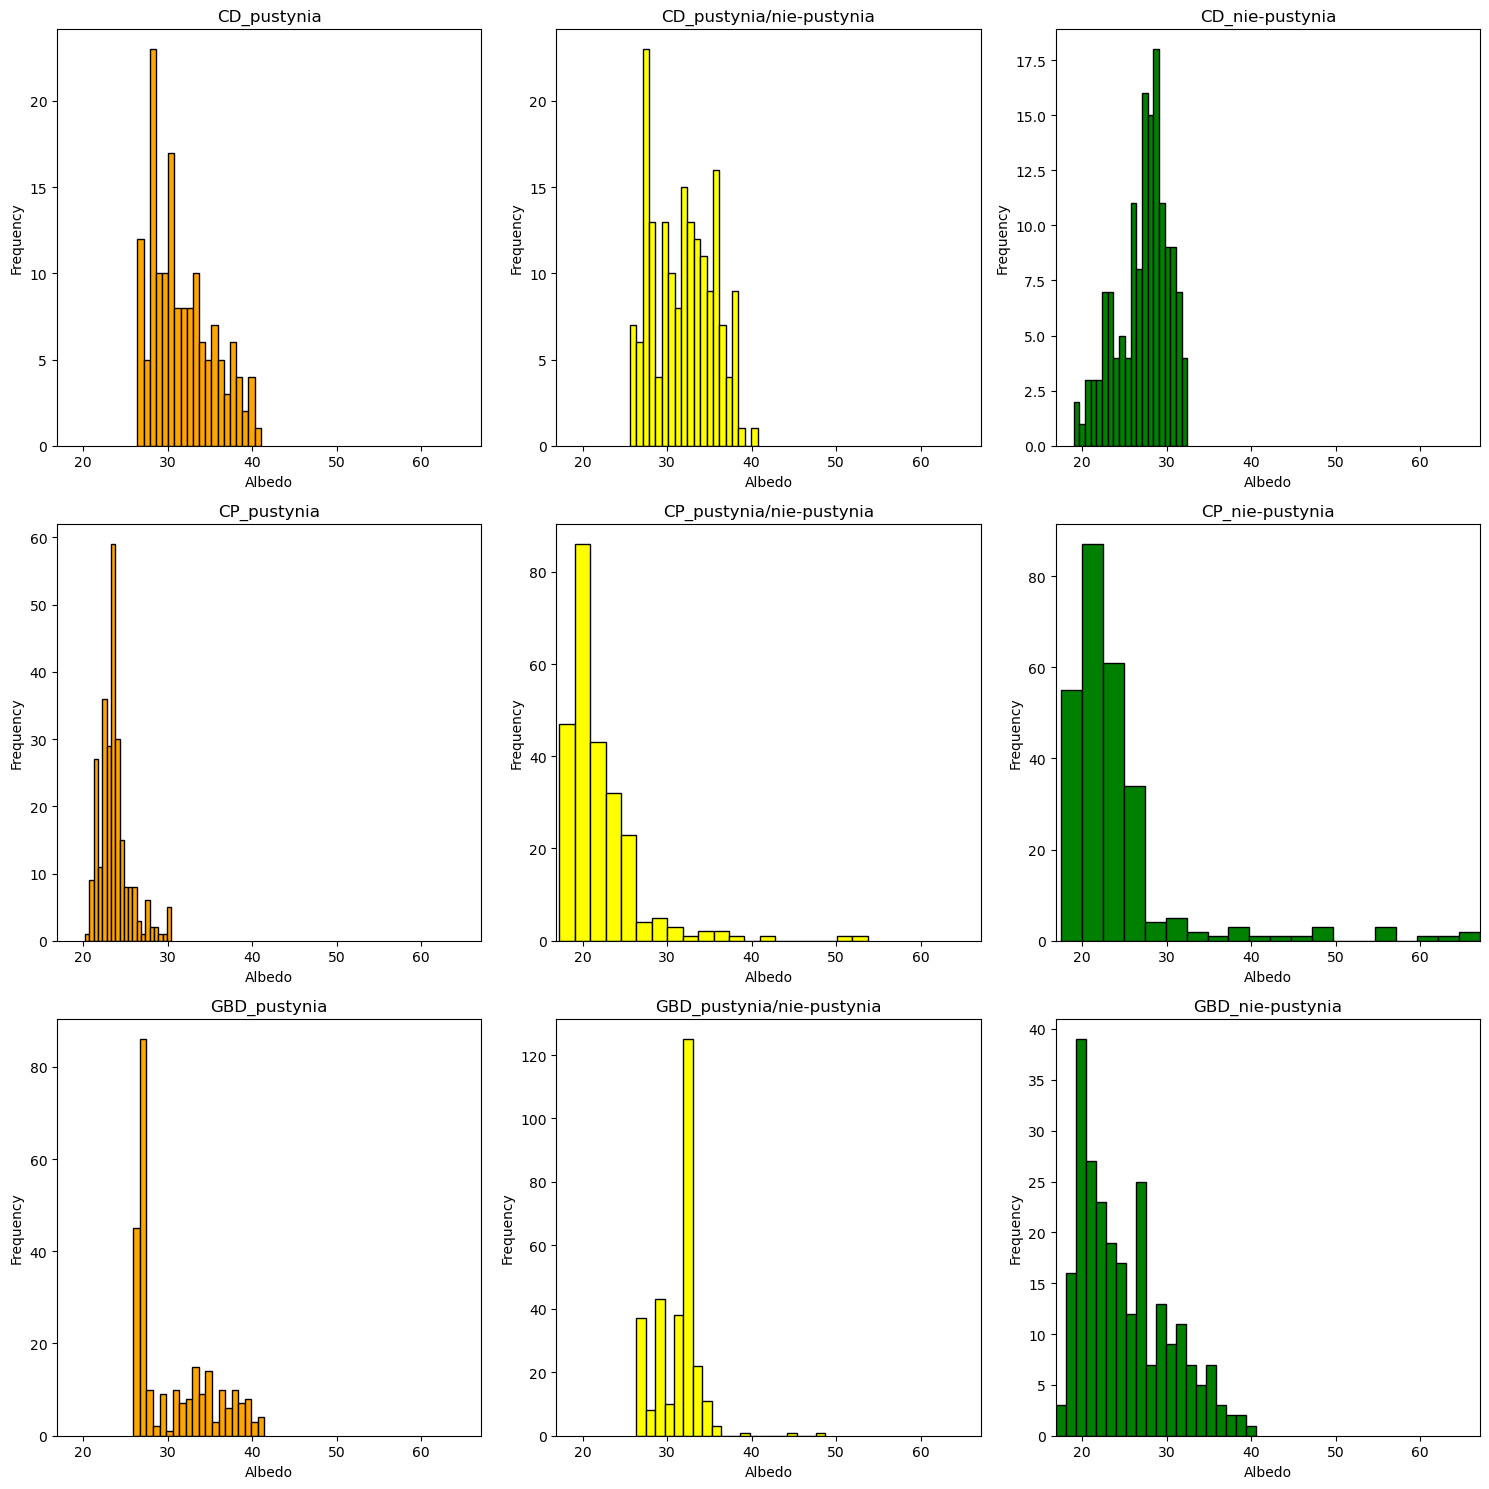

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'Albedo', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'Albedo', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'Albedo', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'Albedo', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'Albedo', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'Albedo', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'Albedo', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'Albedo', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'Albedo', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [29]:
Albedo_graniczne = round(
    pd.Series([
        CD['Albedo'].quantile(0.25),
        niepustynia_przy_CD['Albedo'].quantile(0.75),
        CP['Albedo'].quantile(0.25),
        niepustynia_przy_CP['Albedo'].quantile(0.75),
        GBD['Albedo'].quantile(0.25),
        niepustynia_przy_GBD['Albedo'].quantile(0.75),
    ]).mean(skipna=True), 1
)

In [30]:
print("Albedo_graniczne:", Albedo_graniczne)

Albedo_graniczne: 26.7


##### SoilT_40_100cm (wskaźnik temperatury gleby w warstwie o głębokości od 40 do 100 cm)

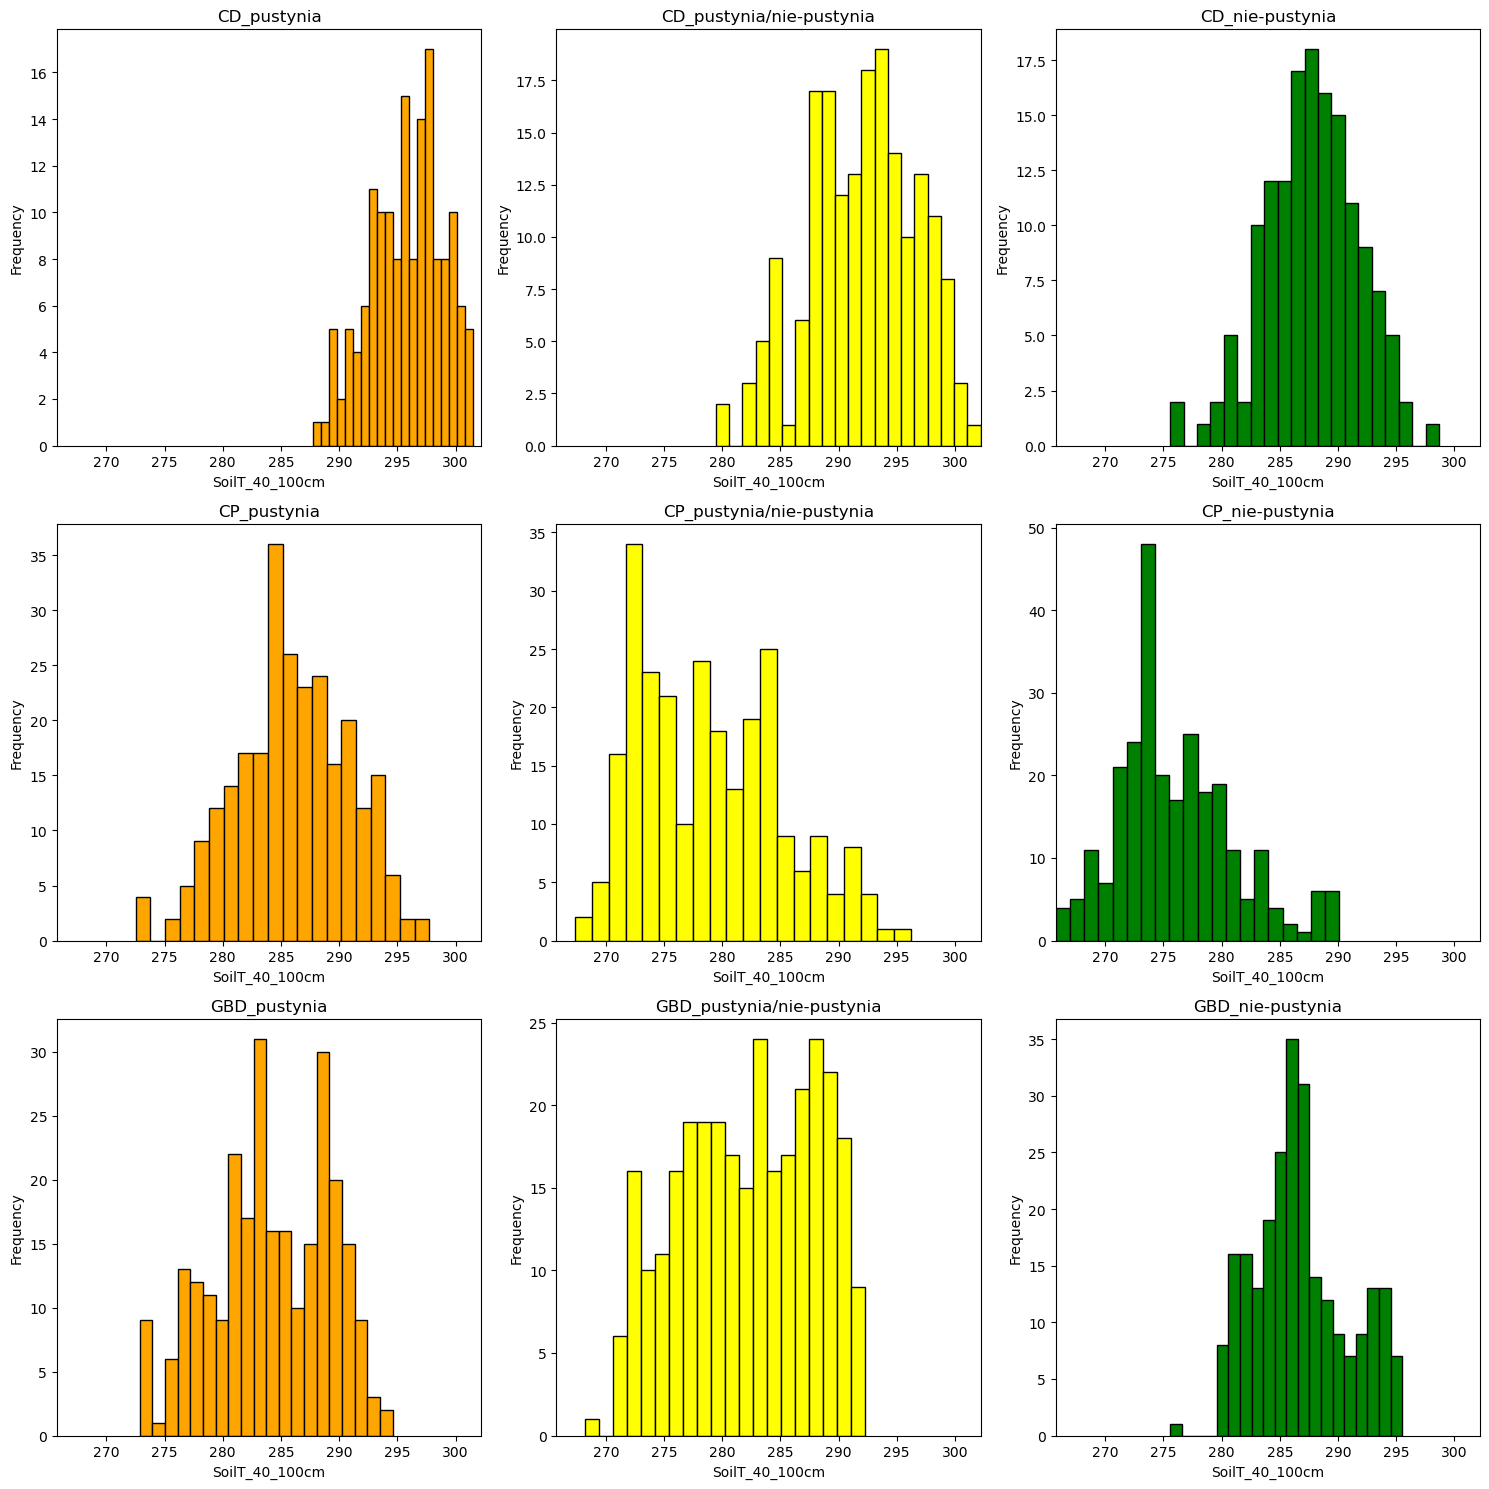

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

plot_histogram(axes[0, 0], CD, 'SoilT_40_100cm', "CD_pustynia", "orange")
plot_histogram(axes[0, 1], CD_i_niepustynia, 'SoilT_40_100cm', "CD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[0, 2], niepustynia_przy_CD, 'SoilT_40_100cm', "CD_nie-pustynia", "green")

plot_histogram(axes[1, 0], CP, 'SoilT_40_100cm', "CP_pustynia", "orange")
plot_histogram(axes[1, 1], CP_i_niepustynia, 'SoilT_40_100cm', "CP_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[1, 2], niepustynia_przy_CP, 'SoilT_40_100cm', "CP_nie-pustynia", "green")

plot_histogram(axes[2, 0], GBD, 'SoilT_40_100cm', "GBD_pustynia", "orange")
plot_histogram(axes[2, 1], GBD_i_niepustynia, 'SoilT_40_100cm', "GBD_pustynia/nie-pustynia", "yellow")
plot_histogram(axes[2, 2], niepustynia_przy_GBD, 'SoilT_40_100cm', "GBD_nie-pustynia", "green")

plt.tight_layout()
plt.show()

In [32]:
SoilT_40_100cm_graniczne = round(
    pd.Series([
        CD['SoilT_40_100cm'].quantile(0.25),
        niepustynia_przy_CD['SoilT_40_100cm'].quantile(0.75),
        CP['SoilT_40_100cm'].quantile(0.25),
        niepustynia_przy_CP['SoilT_40_100cm'].quantile(0.75),
        GBD['SoilT_40_100cm'].quantile(0.25),
        niepustynia_przy_GBD['SoilT_40_100cm'].quantile(0.75),
    ]).mean(skipna=True)
)

In [33]:
print("SoilT_40_100cm_graniczne:", SoilT_40_100cm_graniczne)

SoilT_40_100cm_graniczne: 286


# Klasyfikacja: pustynia / nie-pustynia

In [34]:
NASA = NASA[['lon', 'lat', 'Rainf', 'Evap', 'AvgSurfT', 'Albedo', 'SoilT_40_100cm', 'GVEG']].dropna()
NASA['klasyfikacja'] = np.nan

In [35]:
def classify(row: pd.DataFrame):
    conditions = [
        row['Rainf'] <= Rainf_graniczne,
        row['Evap'] <= Evap_graniczne,
        row['GVEG'] <= GVEG_graniczne,
        row['AvgSurfT'] >= AvgSurfT_graniczne,
        row['Albedo'] >= Albedo_graniczne,
        row['SoilT_40_100cm'] >= SoilT_40_100cm_graniczne
    ]
    if np.nansum(conditions) >= 4:
        return "pustynia"
    else:
        return "nie-pustynia"

In [36]:
NASA['klasyfikacja'] = NASA.apply(classify, axis=1)

In [38]:
NASA.head(10)

,lon,lat,Rainf,Evap,AvgSurfT,Albedo,SoilT_40_100cm,GVEG,klasyfikacja
0,-119.0625,42.4375,22.067200,7.629402,280.274600,40.877690,283.781200,0.030827,pustynia
1,-91.6875,42.6875,56.069500,8.200099,271.731000,31.644440,279.603400,0.230389,nie-pustynia
2,-116.0625,50.3125,60.361220,0.511899,265.515700,65.425000,272.894700,0.203754,nie-pustynia
3,-74.1875,40.9375,125.973500,34.582930,288.077500,24.006720,284.283000,0.575912,nie-pustynia
4,-94.1875,30.0625,284.307600,132.679000,299.511600,24.611110,295.557000,0.615523,nie-pustynia
5,-117.0625,32.9375,1.466000,32.135890,295.495000,22.645830,290.706800,0.300523,pustynia
6,-112.0625,29.4375,0.000000,4.702000,294.737600,43.720830,292.038100,0.061700,pustynia
7,-85.0625,43.4375,58.626400,83.969650,292.448100,24.780560,284.840800,0.737928,nie-pustynia
8,-79.0625,36.1875,116.866585,103.839783,297.019257,24.379168,289.425293,0.779222,nie-pustynia
9,-102.4375,41.6875,26.514110,18.310310,277.460000,33.158600,282.275000,0.221730,pustynia


In [39]:
pustynia_percentage = (NASA['klasyfikacja'] == "pustynia").sum() / len(NASA)

In [40]:
print("pustynia_percentage:", pustynia_percentage)

pustynia_percentage: 0.35213173922851343
